### Step 1: Load essential Python Libraries

In [151]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Step 2: Load Training/Test datasets in Python environment

In [152]:
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv")
test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv")
submission = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_49d68Cx.csv")

In [153]:
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train.shape, test.shape))

Train dataset shape: (614, 13), 
Test dataset shape: (367, 12)


In [154]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [155]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [156]:
# need to predict Loan_Status for given test data - Classification Problem
# first merge the train and test data for Exploratory Data Analysis
train['Source'] = 'train'
test['Source'] = 'test'
test['Loan_Status'] = 'N'
df = pd.concat([train, test], sort = False)
print(train.shape, test.shape, df.shape)

(614, 14) (367, 14) (981, 14)


In [157]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Source'],
      dtype='object')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
 13  Source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [159]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


#### Categorical Columns

In [160]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Source']

In [161]:
categorial_features = df.select_dtypes(include ='object')
categorial_features.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Source
0,LP001002,Male,No,0,Graduate,No,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,train


#### Numerical Columns

In [162]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0


#### Drop unwanted columns

In [163]:
df.drop(['Loan_ID'],axis=1,inplace=True) # Delete Loan_ID from the dataset 
data = df

In [164]:
data.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
Source                0
dtype: int64

### Step 3: Exploratory Data Analysis (EDA)

#### Univariate Analysis

<AxesSubplot:xlabel='Dependents', ylabel='count'>

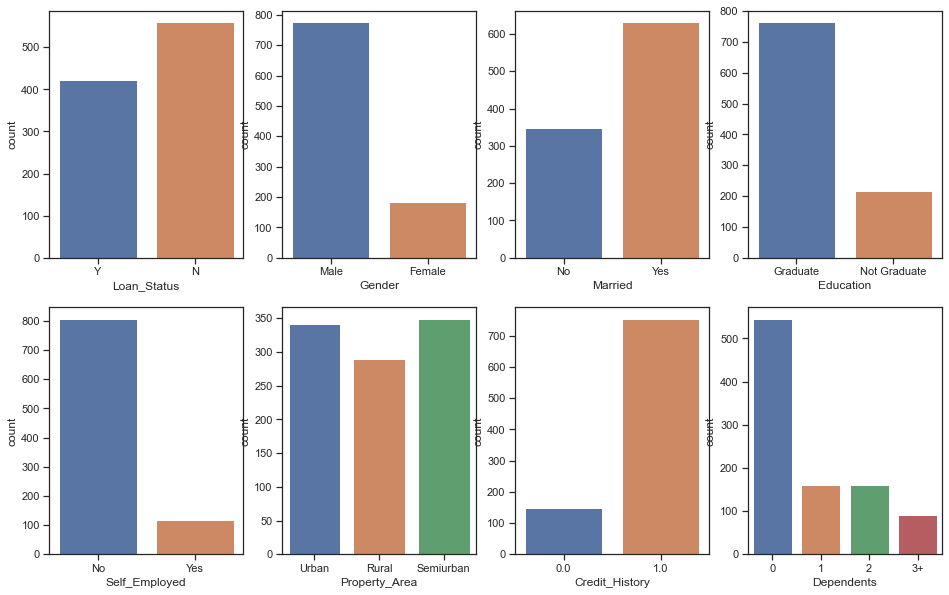

In [165]:
#Univariate Analysis
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status',data=data,ax=ax[0][0])
sns.countplot('Gender',data=data,ax=ax[0][1])
sns.countplot('Married',data=data,ax=ax[0][2])
sns.countplot('Education',data=data,ax=ax[0][3])
sns.countplot('Self_Employed',data=data,ax=ax[1][0])
sns.countplot('Property_Area',data=data,ax=ax[1][1])
sns.countplot('Credit_History',data=data,ax=ax[1][2])
sns.countplot('Dependents',data=data,ax=ax[1][3])

#### Univariate analysis Observations:

* More Loans are Rejected Vs Approved
* Count of Male applicants is more than Female
* Count of Married applicant is more than Non-married
* Count of graduate are more than non-Graduate
* Count of self-employed is less than that of Non-Self-employed
* Maximum properties are located in Semiurban areas
* Credit History is present for many applicants
* Count of applicants with number of dependents=0 is maximum.

#### Bivariate Analysis

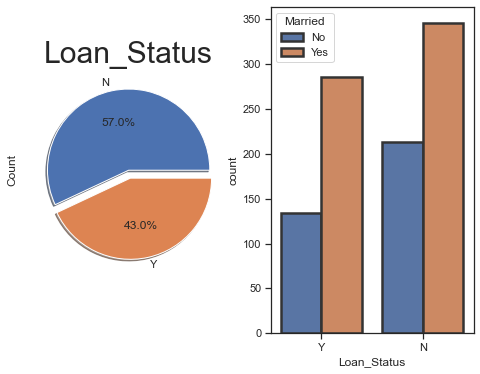

In [166]:
# Explore variable 'Married' with target variable - 'Loan_Status'

f,ax=plt.subplots(1,2,figsize=(8,6))
data['Loan_Status'].value_counts().plot.pie(ax=ax[0],explode=[0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Loan_Status',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Loan_Status',hue='Married',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

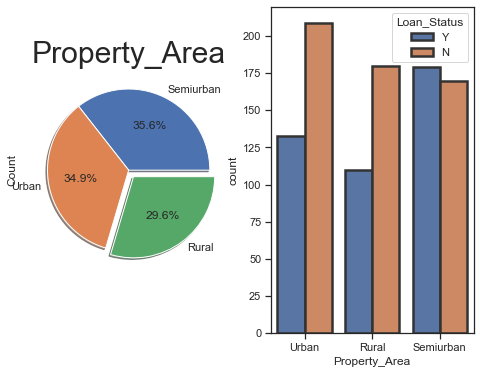

In [167]:
# Variable - 'Property_Area' Vs 'Loan_Status'
f,ax=plt.subplots(1,2,figsize=(8,6))
data['Property_Area'].value_counts().plot.pie(ax=ax[0],explode=[0,0,0.1],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Property_Area',fontsize=30)
ax[0].set_ylabel('Count')
sns.set(font="Verdana")
sns.set_style("ticks")
sns.countplot('Property_Area',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=data,ax=ax[1])
plt.ioff()

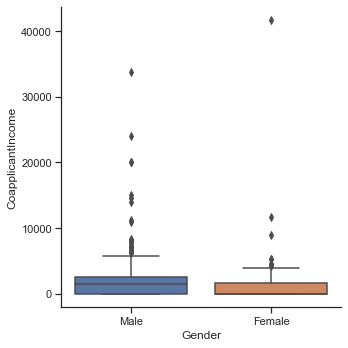

In [168]:
# Variable - 'Gender'  Vs 'CoapplicantIncome'
sns.catplot(x='Gender',y='CoapplicantIncome',data=data,kind='box')

# Mean Co-applicant Income of male is slightly higher than Females.

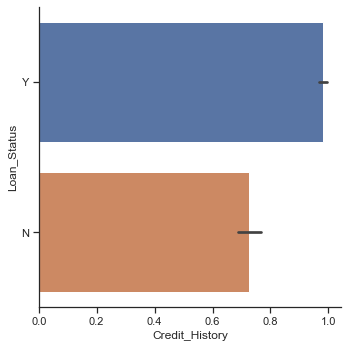

In [169]:
# Variable - 'Credit_History' Vs 'Loan_Status'
sns.catplot(x='Credit_History',y='Loan_Status',kind='bar',data=data)

# If credit history is 1 then high chances of getting loan approved than for credit history = 0

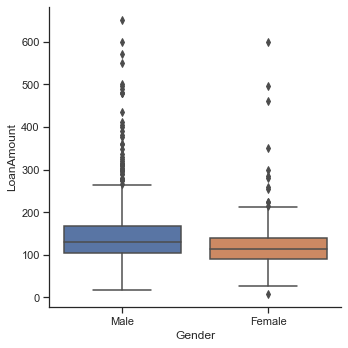

In [170]:
# Variable - 'Gender' Vs 'LoanAmount'
sns.catplot(x='Gender',y='LoanAmount',data=data,kind='box')

# Mean value of Loan Amount applied by male is slightly higher than Females.

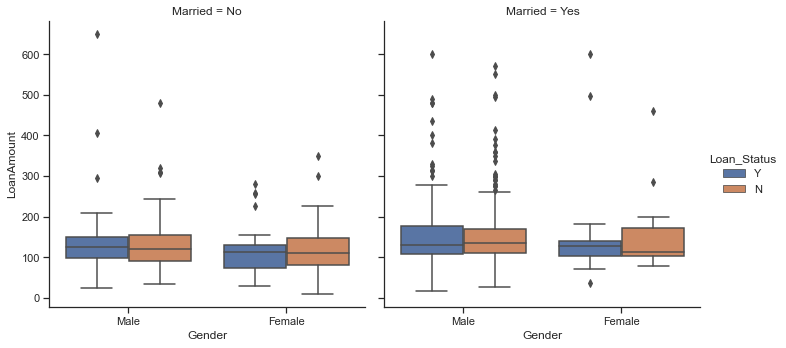

In [171]:
# Variable - 'Gender' Vs 'LoanAmount', hue='Loan_Status', col='Married'
sns.catplot(x='Gender',y='LoanAmount',data=data,kind='box',hue='Loan_Status', col='Married')

# If you are married then loan amount requested is slightly higher than non-married

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

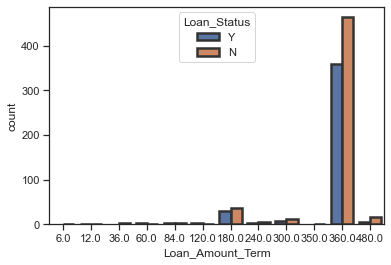

In [172]:
# Variable - 'Loan_Amount_Term' Vs 'Loan_Status'
sns.countplot('Loan_Amount_Term',hue='Loan_Status',linewidth=2.5,edgecolor=".2",data=data)

# Maximum customers requested a tenure of 360 months

### Step 4: Impute Missing values

In [173]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Source                0
dtype: int64

In [174]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Source                0
Loan_Status           0
dtype: int64

In [175]:
# Column - Married. Fill Null values with mode of Married column

train['Married'].value_counts().index[0]
train['Married'].fillna(train['Married'].value_counts().index[0], inplace=True)
test['Married'].fillna(test['Married'].value_counts().index[0], inplace=True)

In [176]:
# Column - Dependents

# If loan status is 1 then, dependent = 2 else dependent=1
train.loc[(train.Dependents.isnull())&(train.Loan_Status==1),'Dependents'] = '2'
train.loc[(train.Dependents.isnull()),'Dependents'] = '1'

# If Credit_History is 1 then, dependent = 2 else dependent=1 for test
test.loc[(test.Dependents.isnull())&(test.Credit_History==1),'Dependents'] = '2'
test.loc[(test.Dependents.isnull()),'Dependents'] = '1'

In [177]:
# Column - Credit_History

# If loan status is 1 then, Credit_History = 1 else Credit_History=0
train.loc[(train.Credit_History.isnull())&(train.Loan_Status==1),'Credit_History'] = 1
train.loc[(train.Credit_History.isnull()),'Credit_History'] = 0

# Fill Null values with mode of Credit_History column for test
test['Credit_History'].fillna(test['Credit_History'].value_counts().index[0], inplace=True)
#In test data, for the user with income = 2733, it was decided to impute credit history as 0 based upon the Income to loan ratio 
test.loc[(test.ApplicantIncome == 2733),'Credit_History']  = 0

In [178]:
# Column - Gender

# Fill Null values with mode of Gender column
train['Gender'].fillna(train['Gender'].value_counts().index[0], inplace=True)

test['Gender'].fillna(test['Gender'].value_counts().index[0], inplace=True)

In [179]:
# Column - Self_Employed

# If Credit_History is 1 then, impute Self_Employed = No else Yes
train.loc[(train.Self_Employed.isnull())&(train.Credit_History==1),'Self_Employed'] ='No'
train.loc[(train.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

# If Credit_History is 1 then, impute Self_Employed = No else Yes for test
test.loc[(test.Self_Employed.isnull())&(test.Credit_History==1),'Self_Employed'] ='No'
test.loc[(test.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

In [180]:
# Column - Loan_Amount_Term. Loan_Amount_Term depends upon gender, married, education, self employed and dependent columns. 
# Hence we will group them by above columns and imput median values. 
# In case if the median is null then we will impute median of the entire Loan_Amount_Term column.

#get the index of the null columns for Loan_Amount_Term - train
index_NaN_Loan_Amount_Term = list(train["Loan_Amount_Term"][train["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term :
    Loan_Amount_Term_med = train["Loan_Amount_Term"].median() # find median of entire Loan_Amount_Term column
    Loan_Amount_Term_pred = train["Loan_Amount_Term"][((train['Gender'] == train.iloc[i]["Gender"]) & (train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med

In [181]:
#Impute Loan term  amount for test
index_NaN_Loan_Amount_Term_test = list(test["Loan_Amount_Term"][test["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term_test :
    Loan_Amount_Term_med = test["Loan_Amount_Term"].median() 
    Loan_Amount_Term_pred = test["Loan_Amount_Term"][(( test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med

In [182]:
#Impute LoanAmount for train
index_NaN_LoanAmount = list(data["LoanAmount"][data["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount :
    LoanAmount_med = data["LoanAmount"].median() # find median of entire LoanAmount column
    LoanAmount_pred = data["LoanAmount"][((data['Property_Area'] == data.iloc[i]["Property_Area"]) & (data['Gender'] == data.iloc[i]["Gender"]) & (data['Married'] == data.iloc[i]["Married"]) & (data['Education'] == data.iloc[i]["Education"]) & (data['Self_Employed'] == data.iloc[i]["Self_Employed"]) & (data['Dependents'] == data.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        data['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        data['LoanAmount'].iloc[i] = LoanAmount_med

In [183]:
#Impute LoanAmount for train
index_NaN_LoanAmount = list(train["LoanAmount"][train["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount :
    LoanAmount_med = train["LoanAmount"].median() # find median of entire LoanAmount column
    LoanAmount_pred = train["LoanAmount"][((train['Property_Area'] == train.iloc[i]["Property_Area"]) & (train['Gender'] == train.iloc[i]["Gender"]) & (train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        train['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        train['LoanAmount'].iloc[i] = LoanAmount_med

In [184]:
#Impute Loan amount for test
index_NaN_LoanAmount_test = list(test["LoanAmount"][test["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount_test :
    LoanAmount_med = test["LoanAmount"].median()
    LoanAmount_pred = test["LoanAmount"][((test['Property_Area'] == test.iloc[i]["Property_Area"]) & (test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        test['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        test['LoanAmount'].iloc[i] = LoanAmount_med

In [185]:
train.isnull().sum() + test.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
Loan_Amount_Term     0
Loan_ID              0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
Source               0
dtype: int64

### Step 5: Feature Engineering

In [186]:
data = pd.concat([train, test], sort = False)

In [187]:
data.shape

(981, 14)

In [188]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,105.0,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [189]:
# Label encode categorical variables
data["Dependents"] = data["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

data["Property_Area"] = data["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

In [190]:
# the LoanAmount applied by all the customers is in thousands, so lets multiply LoanAmount column with 1000

data['LoanAmount'] = data['LoanAmount'] * 1000

In [191]:
# Drop unwanted columns

data.drop(['Loan_ID'],axis=1,inplace=True) # Delete Loan_ID from the dataset 

In [192]:
# add new features to our datasets

#Add new features - Total income
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Dropping unwanted columns - 'ApplicantIncome','CoapplicantIncome'
data.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [193]:
# Categorical variables wise sum of numerical columns
data['Credit_History_Income_Sum']=data.groupby(['Credit_History'])['Total_Income'].transform('sum')
data['Dependents_LoanAmount_Sum']=data.groupby(['Dependents'])['LoanAmount'].transform('sum')

In [194]:
# Create a new column - EMI

#Lets assume that interest rate=10.0 # hence r = ((10/12)/100) = 0.00833

r = 0.00833
data['EMI']=data.apply(lambda x: (x['LoanAmount']*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**((x['Loan_Amount_Term'])-1)),axis=1)

In [195]:
# Categorical variables wise mean of EMI
data['Dependents_EMI_mean']=data.groupby(['Dependents'])['EMI'].transform('mean')

In [196]:
# LoanAmount_per_Total_Income
data['LoanAmount_per_Total_Income']=data['LoanAmount']/data['Total_Income']

# Loan_Amount_Term_per_Total_Income
data['Loan_Amount_Term_per_Total_Income']=data['Loan_Amount_Term']/data['Total_Income']

In [197]:
# EMI_per_Loan_Amount_Term
data['EMI_per_Loan_Amount_Term']=data['EMI']/data['Loan_Amount_Term']

# EMI_per_LoanAmount
data['EMI_per_LoanAmount']=data['EMI']/data['LoanAmount']

In [198]:
# Categorical variables wise mean of LoanAmount_per_Total_Income
data['Property_Area_LoanAmount_per_Total_Income_mean']=data.groupby(['Property_Area'])['LoanAmount_per_Total_Income'].transform('mean')

In [199]:
################################# Bin formation ###############################################
from sklearn.preprocessing import KBinsDiscretizer

Loan_Amount_Term_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['Loan_Amount_Term_Bins'] = Loan_Amount_Term_discretizer.fit_transform(data['Loan_Amount_Term'].values.reshape(-1,1)).astype(float)

Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['Total_Income_Bins'] = Total_Income_discretizer.fit_transform(data['Total_Income'].values.reshape(-1,1)).astype(float)

LoanAmount_per_Total_Income_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['LoanAmount_per_Total_Income_Bins'] = LoanAmount_per_Total_Income_discretizer.fit_transform(data['LoanAmount_per_Total_Income'].values.reshape(-1,1)).astype(float)

In [200]:
print("combine_set dataset shape: {0}".format(data.shape))

combine_set dataset shape: (981, 24)


In [201]:
#Drop unwanted columns
data=data.drop(['EMI'],axis=1)
data=data.drop(['Total_Income'],axis=1)
data=data.drop(['LoanAmount_per_Total_Income'],axis=1)

In [202]:
print("combine_set dataset shape: {0}".format(data.shape))

combine_set dataset shape: (981, 21)


In [206]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,...,Credit_History_Income_Sum,Dependents_LoanAmount_Sum,Dependents_EMI_mean,Loan_Amount_Term_per_Total_Income,EMI_per_Loan_Amount_Term,EMI_per_LoanAmount,Property_Area_LoanAmount_per_Total_Income_mean,Loan_Amount_Term_Bins,Total_Income_Bins,LoanAmount_per_Total_Income_Bins
0,Male,No,0,Graduate,No,105000.0,360.0,1.0,2,1,...,5.307796e+06,72777000.0,1121.618947,0.061549,2.449822,0.008399,23.360438,1.0,2.0,1.0
1,Male,Yes,1,Graduate,No,128000.0,360.0,1.0,0,0,...,5.307796e+06,26023000.0,1234.899985,0.059104,2.986449,0.008399,23.988448,1.0,3.0,1.0
2,Male,Yes,0,Graduate,Yes,66000.0,360.0,1.0,2,1,...,5.307796e+06,72777000.0,1121.618947,0.120000,1.539888,0.008399,23.360438,1.0,0.0,1.0
3,Male,Yes,0,Not Graduate,No,120000.0,360.0,1.0,2,1,...,5.307796e+06,72777000.0,1121.618947,0.072860,2.799796,0.008399,23.360438,1.0,2.0,2.0
4,Male,No,0,Graduate,No,141000.0,360.0,1.0,2,1,...,5.307796e+06,72777000.0,1121.618947,0.060000,3.289761,0.008399,23.360438,1.0,3.0,2.0


In [204]:
# Label encode categorical variables
data["Loan_Status"] = data["Loan_Status"].map({"Y": 1, "N": 0})

In [205]:
# Divide into test and train:
train_df = data.loc[data['Source']=="train"]
test_df = data.loc[data['Source']=="test"]

In [207]:
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_df.shape, test_df.shape))

Train dataset shape: (614, 21), 
Test dataset shape: (367, 21)


In [208]:
# Drop unnecessary columns:
test_df.drop(['Loan_Status','Source'], axis=1, inplace=True)
train_df.drop(['Source'], axis=1, inplace=True)

In [209]:
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_df.shape, test_df.shape))

Train dataset shape: (614, 20), 
Test dataset shape: (367, 19)


In [210]:
#Label encode categorical variables using get_dummies()
train_df = pd.get_dummies(train_df, drop_first = True)
test_df = pd.get_dummies(test_df, drop_first = True)

In [211]:
train_df.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credit_History_Income_Sum,Dependents_LoanAmount_Sum,Dependents_EMI_mean,Loan_Amount_Term_per_Total_Income,EMI_per_Loan_Amount_Term,EMI_per_LoanAmount,Property_Area_LoanAmount_per_Total_Income_mean,Loan_Amount_Term_Bins,Total_Income_Bins,LoanAmount_per_Total_Income_Bins,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes
0,0,105000.0,360.0,1.0,2,1,5.307796e+06,72777000.0,1121.618947,0.061549,2.449822,0.008399,23.360438,1.0,2.0,1.0,1,0,0,0
1,1,128000.0,360.0,1.0,0,0,5.307796e+06,26023000.0,1234.899985,0.059104,2.986449,0.008399,23.988448,1.0,3.0,1.0,1,1,0,0
2,0,66000.0,360.0,1.0,2,1,5.307796e+06,72777000.0,1121.618947,0.120000,1.539888,0.008399,23.360438,1.0,0.0,1.0,1,1,0,1
3,0,120000.0,360.0,1.0,2,1,5.307796e+06,72777000.0,1121.618947,0.072860,2.799796,0.008399,23.360438,1.0,2.0,2.0,1,1,1,0
4,0,141000.0,360.0,1.0,2,1,5.307796e+06,72777000.0,1121.618947,0.060000,3.289761,0.008399,23.360438,1.0,3.0,2.0,1,0,0,0


In [212]:
#Drop target variable from X and copy to y
X=train_df.drop(['Loan_Status'],axis=1)
y=train_df['Loan_Status']

In [213]:
#Train-test split (80:20)
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)

print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_x.shape, test_x.shape))

Train dataset shape: (491, 19), 
Test dataset shape: (123, 19)


In [215]:
### Standard scaling using StandardScaler ###
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)
X_main_test_sc =  sc.transform(test_df)

### Step 5: Model Building

In [216]:
#Load classifiers and accurcy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train model
clf_0 = LogisticRegression().fit(train_x, train_y)

# Predict on test set
pred_y_0 = clf_0.predict(test_x)

# How's the accuracy?
print( "Accuracy = " ,accuracy_score(pred_y_0, test_y).round(2) * 100)

Accuracy =  73.0


Text(89.18, 0.5, 'Predicted')

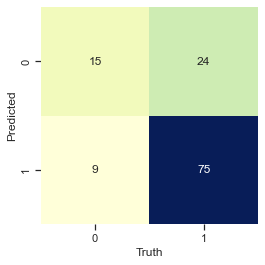

In [217]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(test_y,pred_y_0) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [226]:
X_main_test_sc

array([[-1.57375810e-16,  1.10000000e+05,  3.60000000e+02, ...,
         1.00000000e+00,  4.34140164e-17, -3.97961817e-17],
       [ 1.00000000e+00,  1.26000000e+05,  3.60000000e+02, ...,
         1.00000000e+00,  4.34140164e-17, -3.97961817e-17],
       [ 2.00000000e+00,  2.08000000e+05,  3.60000000e+02, ...,
         1.00000000e+00,  4.34140164e-17, -3.97961817e-17],
       ...,
       [-1.57375810e-16,  1.26000000e+05,  3.60000000e+02, ...,
        -3.61783470e-17,  4.34140164e-17, -3.97961817e-17],
       [-1.57375810e-16,  1.58000000e+05,  3.60000000e+02, ...,
         1.00000000e+00,  4.34140164e-17, -3.97961817e-17],
       [-1.57375810e-16,  9.80000000e+04,  1.80000000e+02, ...,
        -3.61783470e-17,  4.34140164e-17,  1.00000000e+00]])

In [224]:
#Predict on actual test dataset for final prediction
pred_test = clf_0.predict(X_main_test_sc)

In [225]:
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [223]:
#Predict on actual test dataset for final prediction
pred_test = clf_0.predict(X_main_test_sc)

#If the predict value is > 0.5 then insert 'Y', else insert 'N'
predictions_test_final = [ 'Y' if y>=0.01 else 'N' for y in pred_test]

submission['Loan_Status'] = predictions_test_final
submission.to_csv('./Balamurugan_Loan_Status.csv',index=False)